In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import scale


%matplotlib inline

In [2]:
zip_f = zipfile.ZipFile('data/digits/digit-recognizer.zip','r')
zip_f.extractall('data/digits/')
zip_f.close()

!ls -la 'data/digits/'

итого 141032
drwxrwxr-x 2 sda sda     4096 июн 28 00:52 .
drwxrwxr-x 4 sda sda     4096 июн 27 23:04 ..
-rw-rw-r-- 1 sda sda 16054568 июн 27 22:43 digit-recognizer.zip
-rw-rw-r-- 1 sda sda   212908 июн 28 02:04 result.csv
-rw-rw-r-- 1 sda sda   240909 июн 28 08:45 sample_submission.csv
-rw-rw-r-- 1 sda sda 51118296 июн 28 08:45 test.csv
-rw-rw-r-- 1 sda sda 76775041 июн 28 08:45 train.csv


In [3]:
#!cat 'data/digits/train.csv'


In [6]:
df = pd.read_csv('data/digits/train.csv')
df.shape, df.columns

((42000, 785),
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785))

In [9]:
y = df.iloc[:41000,0]
X = scale(df.iloc[:41000,1:].values).reshape(41000,28,28)

y_val = df.iloc[41000:,0]
X_val = scale(df.iloc[41000:,1:].values).reshape(1000,28,28)

9 (28, 28)


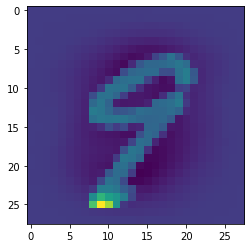

In [10]:
# попробую поизвлекать картинки
i = 11

print(y[i], X[i].shape)
plt.imshow(X[i])

In [11]:
X = X.reshape(41000,28,28,1)
X_val = X_val.reshape(1000,28,28,1)

In [12]:
# хочу сделать прикольную модельку с рюшечками с финтиклюшечками так чтобы вау

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),   
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
model.fit(X, y, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
1282/1282 [==============================] - 356s 277ms/step - loss: 0.3663 - accuracy: 0.8858 - val_loss: 0.1754 - val_accuracy: 0.9430
Epoch 2/10
1282/1282 [==============================] - 347s 271ms/step - loss: 0.2278 - accuracy: 0.9295 - val_loss: 0.1373 - val_accuracy: 0.9520
Epoch 3/10
1282/1282 [==============================] - 344s 269ms/step - loss: 0.2063 - accuracy: 0.9383 - val_loss: 0.1551 - val_accuracy: 0.9510
Epoch 4/10
1282/1282 [==============================] - 344s 269ms/step - loss: 0.1791 - accuracy: 0.9456 - val_loss: 0.1232 - val_accuracy: 0.9570
Epoch 5/10
1282/1282 [==============================] - 345s 269ms/step - loss: 0.1768 - accuracy: 0.9472 - val_loss: 0.1129 - val_accuracy: 0.9680
Epoch 6/10
1282/1282 [==============================] - 345s 269ms/step - loss: 0.1554 - accuracy: 0.9534 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 7/10
1282/1282 [==============================] - 347s 271ms/step - loss: 0.1564 - accuracy: 0.9527 - val_

,loss,accuracy,val_loss,val_accuracy
0,0.366304,0.885829,0.175373,0.943
1,0.227781,0.929512,0.137281,0.952
2,0.206347,0.938293,0.155120,0.951
3,0.179072,0.945634,0.123214,0.957
4,0.176780,0.947195,0.112853,0.968


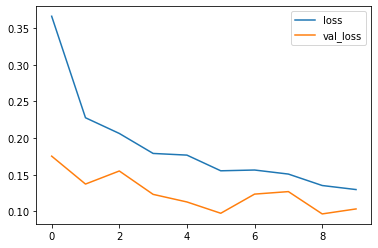

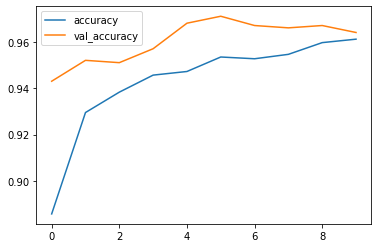

In [16]:
loss = pd.DataFrame(model.history.history)
loss[['loss', 'val_loss']].plot()
loss[['accuracy', 'val_accuracy']].plot()
loss.head()

In [17]:
X_test = pd.read_csv('data/digits/test.csv')
print(X_test.shape)
X_test = X_test.values.reshape(28000,28,28,1)
print(X_test.shape)
        

(28000, 784)
(28000, 28, 28, 1)


In [18]:
prediction = model.predict(X_test)

In [19]:
df = pd.DataFrame({'ImageId': np.arange(1, X_test.shape[0]+1),
                   'Label': np.argmax(prediction, axis=-1)})
df.head()                

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [20]:
df.to_csv('data/digits/result.csv', index=False)